### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline


The "ISLP Hitters" dataset, often referred to simply as the "Hitters" dataset, is a dataset commonly used in statistics and machine learning for regression analysis. It is part of the "Introduction to Statistical Learning with Applications in R" (ISLR) textbook, hence the abbreviation "ISLR/ISLP."

This dataset contains information about Major League Baseball (MLB) hitters and their salaries. It is used to explore the relationship between various factors and a player's salary, making it suitable for regression analysis.

Here are the features included in the Hitters dataset:

AtBat: Number of times at bat in the previous year.
Hits: Number of hits in the previous year.
HmRun: Number of home runs in the previous year.
Runs: Number of runs in the previous year.
RBI: Number of runs batted in in the previous year.
Walks: Number of walks in the previous year.
Years: Number of years in the major leagues.
CAtBat: Number of times at bat during their career.
CHits: Number of hits during their career.
CHmRun: Number of home runs during their career.
CRuns: Number of runs during their career.
CRBI: Number of runs batted in during their career.
CWalks: Number of walks during their career.
League: A factor with levels A and N indicating the player's league at the end of 1986.
Division: A factor with levels E and W indicating the player's division at the end of 1986.
PutOuts: Number of put outs in the previous year.
Assists: Number of assists in the previous year.
Errors: Number of errors in the previous year.
Salary: Player's salary in thousands of dollars.
This dataset is commonly used for regression tasks to predict a player's salary based on the other features provided. It's a valuable resource for teaching and practicing regression techniques in statistics and machine learning.

### Load and Preprocess the Data

In [2]:
# Loading the dataset
Hitters = pd.read_csv('Hitters.csv')
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# Converting non-numeric variables to numerical by getting dummy variables
Hitters['League'] = pd.get_dummies(Hitters['League'], drop_first=True)
Hitters['Division'] = pd.get_dummies(Hitters['Division'], drop_first=True)
Hitters['NewLeague'] = pd.get_dummies(Hitters['NewLeague'], drop_first=True)
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,False,False,446,33,20,NaN,False
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,True,True,632,43,10,475.0,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,False,True,880,82,14,480.0,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,True,False,200,11,3,500.0,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,True,False,805,40,4,91.5,True


In [4]:
Hitters.shape

(322, 20)

In [5]:
# Handling missing values by dropping them
Hitters.dropna(axis=0, inplace=True)
Hitters.shape

(263, 20)

In [6]:
# Separating features and target variable
X = Hitters.drop(['Salary'], axis=1)
y = Hitters['Salary']

### Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Set up Cross Validation Strategy

In [8]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

### Ridge Regression

In [9]:
## selecting 20 values of alpha
alphas = np.logspace(-6, 6, 20)

In [10]:
## calculating mse for different values of alpha:
mse_scores_ridge = []

for alpha in alphas:
    model = make_pipeline(
        StandardScaler(),
        Ridge(alpha=alpha)
    )
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    mse_scores_ridge.append(-1 * scores.mean())

### scikit-learn's cross-validation functions aim to maximize the scoring function, 
# so using the negative MSE allows for consistency with this convention.


# Identify the best alpha
best_alpha_ridge = alphas[np.argmin(mse_scores_ridge)]
print("Best ridge alpha is", best_alpha_ridge )

Best ridge alpha is 162.37767391887175


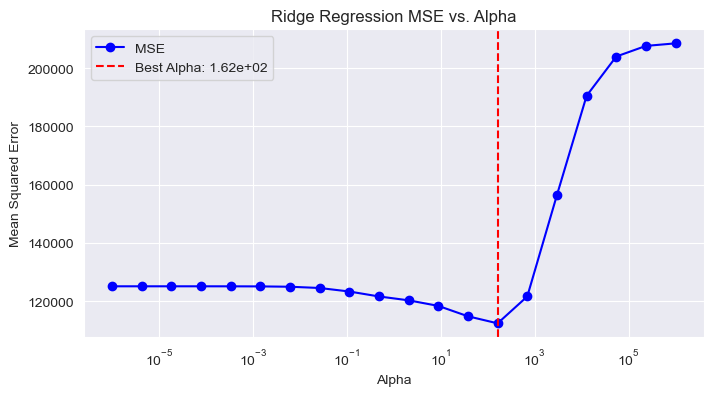

In [11]:
## Plot MSE vs Alpha for Ridge Regression
plt.figure(figsize=(8, 4))
plt.semilogx(alphas, mse_scores_ridge, label='MSE', color='blue', marker='o')
##This line creates a plot with logarithmically scaled x-axis (gamma) and linearly scaled y-axis (MSE). 
# It plots the MSE scores (mse_scores_kernel) against the gamma values (gammas). 
# The plot is labeled 'MSE', displayed in green color, and marker 'o' is used to represent data points.
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression MSE vs. Alpha')
plt.axvline(x=best_alpha_ridge, color='red', linestyle='--', label=f'Best Alpha: {best_alpha_ridge:.2e}')

## This line adds a vertical line to the plot at the position of the best gamma (best_gamma_kernel). 
# The line is colored red, dashed ('--'), and labeled with the value of the best gamma.
plt.legend()
plt.show()

### Kernel regression for Gaussian Kernels:

In [12]:
gammas = np.logspace(-4, -1, 20)
alpha_optimal_kernel_ridge = best_alpha_ridge  # Use the best alpha found for Ridge or another value

In [13]:
## Calculating mse for different Gammas:
mse_scores_kernel = []

for gamma in gammas:
    model = make_pipeline(
        StandardScaler(),
        KernelRidge(alpha=alpha_optimal_kernel_ridge, kernel='rbf', gamma=gamma)
    )
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    mse_scores_kernel.append(-1 * scores.mean())

# Identify the best gamma
best_gamma_kernel = gammas[np.argmin(mse_scores_kernel)]
print("best gamma is", best_gamma_kernel)

best gamma is 0.0001


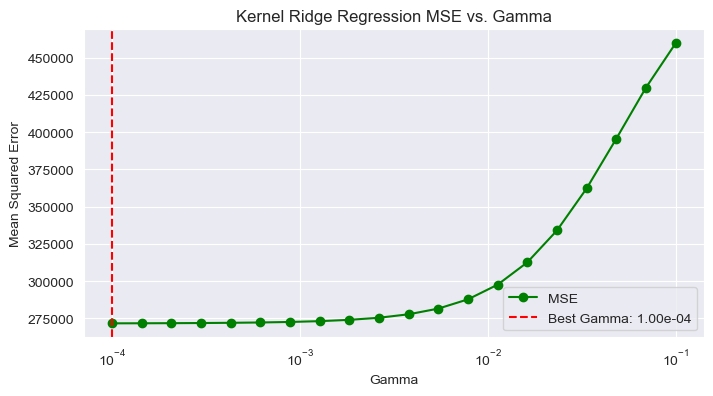

In [14]:
## MSE vs Gamma for Kernel Ridge Regression using Gaussian Kernels:
plt.figure(figsize=(8, 4))
plt.semilogx(gammas, mse_scores_kernel, label='MSE', color='green', marker='o')
plt.xlabel('Gamma')
plt.ylabel('Mean Squared Error')
plt.title('Kernel Ridge Regression MSE vs. Gamma')
plt.axvline(x=best_gamma_kernel, color='red', linestyle='--', label=f'Best Gamma: {best_gamma_kernel:.2e}')
plt.legend()
plt.show()

In [15]:
## Test MSe

In [16]:
# Ridge model with best alpha
ridge_model = make_pipeline(
    StandardScaler(),
    Ridge(alpha=best_alpha_ridge)
)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Kernel Ridge model with best gamma
kernel_model = make_pipeline(
    StandardScaler(),
    KernelRidge(alpha=alpha_optimal_kernel_ridge, kernel='rbf', gamma=best_gamma_kernel)
)
kernel_model.fit(X_train, y_train)
y_pred_kernel = kernel_model.predict(X_test)
mse_kernel = mean_squared_error(y_test, y_pred_kernel)

print(f"Test MSE for Ridge: {mse_ridge}")
print(f"Test MSE for Kernel Ridge: {mse_kernel}")


Test MSE for Ridge: 146758.28924280405
Test MSE for Kernel Ridge: 220496.467625622


In [17]:
if mse_ridge < mse_kernel:
    print("Ridge Regression performs better on the test set.")
else:
    print("Kernel Ridge Regression performs better on the test set.")

Ridge Regression performs better on the test set.


### Polynomial regression

In [18]:
# Define degrees for polynomial features
degrees = [2, 3, 4,5,6]

# Evaluate Polynomial Regression across degrees
mse_scores_poly = []

for degree in degrees:
    model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=degree),
        Ridge(alpha=best_alpha_ridge)
    )
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    mse_scores_poly.append(-1 * scores.mean())

# Identify the best degree for Polynomial Regression
best_degree_poly = degrees[np.argmin(mse_scores_poly)]
print("Best degree for Polynomial Regression:", best_degree_poly)

Best degree for Polynomial Regression: 2


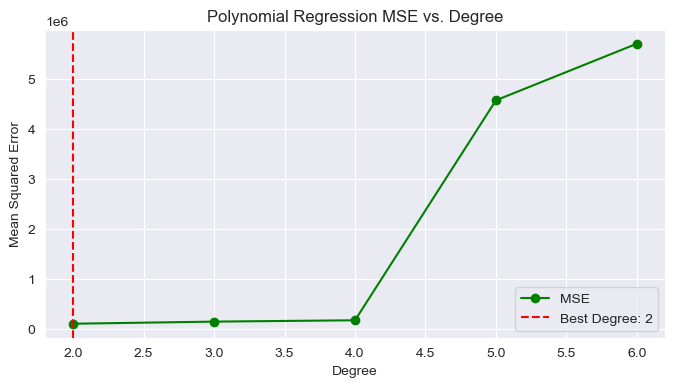

In [19]:
# Plot MSE vs. degree for Polynomial Regression
plt.figure(figsize=(8, 4))
plt.plot(degrees, mse_scores_poly, label='MSE', color='green', marker='o')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression MSE vs. Degree')
plt.axvline(x=best_degree_poly, color='red', linestyle='--', label=f'Best Degree: {best_degree_poly}')
plt.legend()
plt.show()

In [22]:
# Train Polynomial Regression model with best degree
poly_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    Ridge(alpha=best_alpha_ridge)

)

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)


print("Test MSE for Ridge Regression:", mse_ridge)
print("Test MSE for Polynomial Regression:", mse_poly)

# Determine which model performs better
if mse_ridge < mse_poly:
    print("Ridge Regression performs better on the test set.")
else:
    print("Polynomial Regression performs better on the test set.")

Test MSE for Ridge Regression: 146758.28924280405
Test MSE for Polynomial Regression: 104678.26636654348
Polynomial Regression performs better on the test set.
